In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
main_dir = '/content/gdrive/My Drive/UpworkNotebooks/Opera Files/'

!ls -ltra '{main_dir}'/.

Mounted at /content/gdrive
ls: '/content/gdrive/My Drive/UpworkNotebooks/Opera Files//./Audios': No such file or directory
total 28
lrw------- 1 root root    0 May  1 02:47 Audios -> /content/gdrive/.shortcut-targets-by-id/1DOvML8hO7v6XEq5-HQAQSvo7eKca7tSf/Audios
drwx------ 2 root root 4096 Sep 12 11:40 New_male_only_200_each
drwx------ 2 root root 4096 Sep 22 14:29 All_Data
drwx------ 2 root root 4096 Sep 22 14:40 Keras_Tuner_Logs
drwx------ 2 root root 4096 Sep 22 14:57 Documentation
drwx------ 2 root root 4096 Sep 22 15:02 Helper_Notebooks
drwx------ 2 root root 4096 Sep 22 15:03 Csv_Files
drwx------ 2 root root 4096 Sep 22 15:05 Main_Notebooks


In [2]:
!pip install -q librosa
!pip install -q tensorflow_io
!pip install -q pysoundfile
!pip install -q -U keras-tuner

     |████████████████████████████████| 22.7 MB 78.6 MB/s 
     |████████████████████████████████| 2.1 MB 63.9 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 


In [3]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_io as tfio

import keras_tuner as kt

from ast import literal_eval

import os
import sys
import time

%matplotlib inline

import urllib.request as urllib2 # For python3
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import librosa
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
from PIL import Image
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv(main_dir + "Csv_Files/males_500.csv")
data = data.sample(frac=1)#randomize the data
data.head()


,path,subregister,Target
1465,/content/gdrive/My Drive/UpworkNotebooks/Opera...,bass_cantante,3
1496,/content/gdrive/My Drive/UpworkNotebooks/Opera...,bass_cantante,3
1159,/content/gdrive/My Drive/UpworkNotebooks/Opera...,baritone_lyric,2
323,/content/gdrive/My Drive/UpworkNotebooks/Opera...,baritone_bassbaritones,0
997,/content/gdrive/My Drive/UpworkNotebooks/Opera...,baritone_lyric,2


In [8]:
def extract_features(file_name):
  audio, sample_rate = librosa.load(file_name) 
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
  mfccs_processed = np.mean(mfccs.T,axis=0)
  mfccs_processed = list(mfccs_processed)
  print(mfccs)
  return mfccs_processed


i=0

for path in data['path']:
  # while i<5
  print(path)
  mfccs = extract_features(path)
  # plt.figure()
  # plt.imshow(mfccs)
  i=i+1
  if i==5:
    break
  

/content/gdrive/My Drive/UpworkNotebooks/Opera Files/All_Data/males_500/bass/bass_cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[-3.77801178e+02 -3.78741394e+02 -3.81581482e+02 ... -2.85676544e+02
  -2.77562683e+02 -2.36433868e+02]
 [ 1.56444122e+02  1.68351166e+02  1.67609009e+02 ...  1.95246048e+02
   1.89528198e+02  1.48365356e+02]
 [-4.21297684e+01 -4.90142593e+01 -6.04556351e+01 ... -1.46312836e+02
  -1.27585464e+02 -9.04821320e+01]
 ...
 [-8.34239006e-01 -1.06120777e+00  1.59960270e-01 ... -1.31850052e+00
  -1.63155842e+00 -2.07375813e+00]
 [-3.04030609e+00 -1.83405685e+00  6.15171432e-01 ... -1.98975372e+00
  -5.53638458e-01  4.44588089e+00]
 [-3.34740448e+00 -3.02133942e+00 -4.50531006e-01 ... -1.57379150e-01
   9.65423584e-01  4.31838989e-01]]
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/All_Data/males_500/bass/bass_cantante/Don_Carlo_-__Ella_giammai_m_amХ__(Paul_Plishka)-_QuKZa_Q9GE_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[-2.96908844e+02 -3.33550171e+02 -4.22326172e+02 ... -4.45459473e+02
  -4.27109314e+02 -3.70471985e+02]
 [ 1.26915779e+02  1.44221771e+02  2.22057541e+02 ...  1.88107651e+02
   1.98713501e+02  1.82686432e+02]
 [-3.55536423e+01 -4.84458389e+01 -9.22122269e+01 ... -1.34837128e+02
  -1.26060974e+02 -9.81874771e+01]
 ...
 [ 6.57996178e-01  3.15086365e-01  1.42258143e+00 ... -1.46171188e+00
   6.03370667e-02  1.14514589e+00]
 [-3.67607117e-01  6.24387741e-01  8.63296509e-01 ... -9.45281982e-03
  -6.20304108e-01 -8.17375183e-01]
 [-7.01072693e-01  5.87104797e-01  2.77897644e+00 ...  3.51980591e+00
   1.58815765e+00  9.37553406e-01]]
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/All_Data/males_500/baritone/baritone_lyric/Francesco_P._Tosti._Vorrei_Morire,_Renato_Bruson,_Baritone.-IspSzvs3PpU_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[-5.1392084e+02 -5.3942688e+02 -5.7702087e+02 ... -8.7971753e+02
  -8.7971753e+02 -8.7971753e+02]
 [ 1.7339246e+02  1.8834015e+02  1.9861060e+02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 5.3504291e+00 -9.7108879e+00 -3.0140762e+01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [-1.3798561e+00 -4.1511345e-01 -7.6534081e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-2.7295794e+00 -1.7123177e+00  3.6458015e-02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 3.7646866e+00  3.6546555e+00  8.2268524e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/All_Data/males_500/baritone/baritone_bassbaritones/La_traviata,_Act_II,_Scene_1_-_Di_Provenza_il_mar,_il_suol-kokDZLXrjw8_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[-2.4831931e+02 -2.7488223e+02 -3.1047748e+02 ... -3.3743707e+02
  -3.3533878e+02 -2.9353494e+02]
 [ 1.8619411e+02  2.0382904e+02  2.0693237e+02 ...  1.9092126e+02
   1.9456247e+02  1.8228433e+02]
 [-5.0859871e+01 -7.9150238e+01 -1.0584386e+02 ... -7.7191528e+01
  -7.5300552e+01 -5.1762756e+01]
 ...
 [-6.4725792e-01 -4.6252489e-01  8.5696602e-01 ... -4.4983354e+00
  -2.8084931e+00 -5.4855824e-01]
 [-3.2559566e+00 -3.9403534e+00 -3.3007431e-01 ... -2.6931229e+00
  -1.7441673e+00 -2.6422215e+00]
 [-6.9427490e-03 -5.8760834e-01  1.6119995e+00 ...  1.9613953e+00
   1.1768265e+00 -8.2921600e-01]]
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/All_Data/males_500/baritone/baritone_lyric/Beautiful_Dreamer-ARuIEPQ27Z4_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[-3.81086517e+02 -4.06174072e+02 -4.43264618e+02 ... -5.09684326e+02
  -4.72646423e+02 -4.32597778e+02]
 [ 1.75460449e+02  1.83578217e+02  1.64095703e+02 ...  1.57163544e+02
   1.77158844e+02  1.43765289e+02]
 [-5.53121300e+01 -7.18662338e+01 -9.11215820e+01 ... -3.12344456e+01
  -3.78340378e+01 -1.38007145e+01]
 ...
 [-1.11199570e+00 -1.02306557e+00 -9.63639259e-01 ... -1.77586079e+00
  -2.41692400e+00  2.90489221e+00]
 [ 1.86869812e+00  2.75665283e+00  4.31343460e+00 ...  2.34773636e-01
   9.84434128e-01  1.30159330e+00]
 [ 1.45306396e+00 -2.27371216e-01 -5.76774597e-01 ...  1.93090057e+00
   4.34858704e+00  1.67228699e+00]]


#Clustering

In [5]:
zipped = set(zip(data['subregister'], data['Target']))
labels = [item[0] for item in zipped]


def targets_to_labels(list_to_convert):
  labels=[]
  for item in list_to_convert:
    for label, target in zipped:
      if item == target:
        labels.append(label)
  return labels

print(zipped)
print(labels)

{('bass_dramatic', 4), ('tenor_spinto', 8), ('baritone_lyric', 2), ('baritone_bassbaritones', 0), ('tenor_dramatic', 5), ('baritone_dramatic', 1), ('tenor_leggero', 6), ('tenor_lyric', 7), ('bass_cantante', 3)}
['bass_dramatic', 'tenor_spinto', 'baritone_lyric', 'baritone_bassbaritones', 'tenor_dramatic', 'baritone_dramatic', 'tenor_leggero', 'tenor_lyric', 'bass_cantante']


In [10]:
#read from mfccs data
processed_data = pd.read_csv(main_dir + "Csv_Files/males_500_mfccs.csv")
processed_data = processed_data.sample(frac=1)

#function for removing problematic classes

def remove_problematic(to_remove, processed_data):
  for subregister in to_remove:
    for label, target in zipped:
      if subregister==label:
        processed_data = processed_data[processed_data['class_label'] != target]
  return processed_data

to_remove = []
to_evaluate = [item for item in labels if item not in to_remove]

processed_data = remove_problematic(to_remove, processed_data)
features = [literal_eval(processed_data['mfccs'].tolist()[i]) for i in range(len(processed_data))]
targets = processed_data["class_label"].tolist()
num_labels = len(set(targets))
print('Selected targets: ', set(targets))
print('Number of classes: ', len(set(targets)) )

Selected targets:  {0, 1, 2, 3, 4, 5, 6, 7, 8}
Number of classes:  9


In [12]:
len(features[0])

128

In [14]:
#read from mfccs data
processed_data = pd.read_csv(main_dir + "Csv_Files/males_500_mfccs.csv")
processed_data = processed_data.sample(frac=1)
processed_data.head()

,mfccs,class_label
3908,"[-498.20798, 156.18079, -23.701939, 0.3292706,...",8
3901,"[-714.1505, 84.27223, -19.271708, -6.0736046, ...",8
567,"[-385.3679, 153.03929, -122.130264, -28.502466...",1
425,"[-286.81335, 149.06561, -94.36947, 17.59639, 4...",0
2999,"[-381.41272, 91.00852, -129.42363, 27.951004, ...",6


Components 	 Fraction of explained variance
	 1 	 0.5310537148048778
	 2 	 0.6566800019754875
	 3 	 0.7190955623823839
	 4 	 0.771007666225846
	 5 	 0.8097140119323782
	 10 	 0.9052694260642896
	 20 	 0.9723033463808959
	 25 	 0.9834183431203761
	 30 	 0.9897448579251787
	 32 	 0.9913863952088641




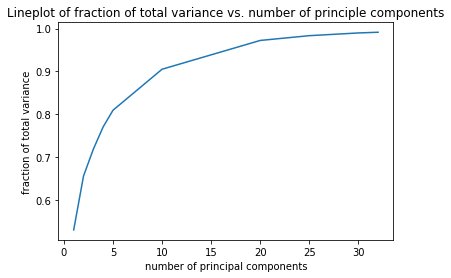

In [20]:

def get_pca_components(data):
  k = [1, 2, 3, 4, 5, 10, 20, 25, 30, 32]
  explained_variances = []
  print('Components \t Fraction of explained variance')
  for components in k:
    pca = PCA(n_components = components)
    data_pc = pca.fit_transform(data)
    fraction_of_variance = sum(pca.explained_variance_ratio_)
    print('\t',components,'\t',fraction_of_variance)
    explained_variances.append(fraction_of_variance)
  print('\n')
  plt.plot(k, explained_variances)
  plt.xlabel("number of principal components")
  plt.ylabel("fraction of total variance")
  plt.title("Lineplot of fraction of total variance vs. number of principle components")
  plt.show()
  pass

get_pca_components(data = features)



In [17]:
pca = PCA(n_components = 32)
data_pc = pca.fit_transform(features)
print( data_pc[2])
print(data_pc.shape)

X = StandardScaler().fit_transform(data_pc)


[-19.53903055 -28.58012238  14.74103834  48.20403937  13.86081811
 -26.76533     38.67709811  15.4759042   -8.84008074   7.84030428
   4.01496861 -20.40980212   9.65700687   4.25287703  -8.7659929
   7.38349904 -10.78211686  14.68982084  17.70733973   6.81636352
  12.69194892   1.01665025  13.00907182  -2.80902233   0.2454785
  -3.48467966  -8.39343408  -9.62119016  -7.32820758  -2.38529914
  -6.35359327   6.08671751]
(4196, 32)


In [18]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(X)
y = np.array(targets)

#scale the data using mean and standard deviation
X = StandardScaler().fit_transform(X)

#scaling data using 0_1 score
# X = MinMaxScaler().fit_transform(X)
# Encode the classification labels
le = LabelEncoder()
y_categorical = to_categorical(le.fit_transform(y))
 
x_train, x_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.15)
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size = 0.15)

print('x_train: ',len(x_train))
print('y_train: ', len(y_train))
print('x_test: ',len(x_test))
print('y_test: ',len(y_test))
print('x_dev: ',len(x_dev))
print('y_dev: ',len(y_dev))

x_train:  3031
y_train:  3031
x_test:  630
y_test:  630
x_dev:  535
y_dev:  535


#HYPER-PARAMETERS



In [46]:
def model_builder(hp):

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(32), dtype=tf.float32,
                          name='input_embedding'))
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units_1 = hp.Int('units_1', min_value=32, max_value=1024, step=16)
  # hp_reg_1 = hp.Float('regs_1', min_value=0.001, max_value=0.1, step=0.01)
  hp_dropout_1 = hp.Float('dropout_1', min_value=0.1, max_value=0.7, step=0.01)
  model.add(keras.layers.Dense(units=hp_units_1, activation='relu', name='dense_1'))
  model.add(keras.layers.Dropout(hp_dropout_1))


  # regularizers.l2(hp_reg_3),
  # Tune the number of units in the Second Dense layer
  hp_units_2 = hp.Int('units_2', min_value=32, max_value=1024, step=16)
  # hp_reg_2 = hp.Float('regs_2', min_value=0.001, max_value=0.1, step=0.001)
  hp_dropout_2 = hp.Float('dropout_2', min_value=0.1, max_value=0.7, step=0.01)
  model.add(keras.layers.Dense(units=hp_units_2, activation='relu', name='dense_2'))
  model.add(keras.layers.Dropout(hp_dropout_2))

  # # # # Tune the number of units in the Third Dense layer
  hp_units_3 = hp.Int('units_3', min_value=32, max_value=1024, step=16)
  # hp_reg_3 = hp.Float('regs_3', min_value=0.001, max_value=0.1, step=0.01)
  # hp_dropout_3 = hp.Float('dropout_3', min_value=0.1, max_value=0.7, step=0.01)
  model.add(keras.layers.Dense(units=hp_units_3, activation='relu', name='dense_3'))
  # model.add(keras.layers.Dropout(hp_dropout_3))

  # hp_units_4 = hp.Int('units_4', min_value=8, max_value=1024, step=8)
  # # hp_reg_3 = hp.Float('regs_3', min_value=0.001, max_value=0.1, step=0.001)
  # hp_dropout_4 = hp.Float('dropout_4', min_value=0.1, max_value=0.7, step=0.01)
  # model.add(keras.layers.Dense(units=hp_units_4, activation='relu', name='dense_4'))
  # model.add(keras.layers.Dropout(hp_dropout_4))

  #Output_Layer
  model.add(keras.layers.Dense(num_labels, activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])

  return model
  

In [48]:
# kt_dir = audio_files_dir + 'kt_dir'
tuner_dir = main_dir + 'Main_Notebooks/New_Features/Tuner_500'
if os.path.exists(tuner_dir)==False:
  !mkdir "{tuner_dir}"

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=30,
                     factor=3,
                     directory=tuner_dir,
                     project_name='mk5')
print(tuner_dir)

/content/gdrive/My Drive/UpworkNotebooks/Opera Files/Main_Notebooks/New_Features/Tuner_500


In [40]:
!ls "{tuner_dir}"

mk1  mk2  mk3  mk4


In [49]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 16, 'sampling': None}
dropout_1 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.7, 'step': 0.01, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 16, 'sampling': None}
dropout_2 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.7, 'step': 0.01, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}


In [50]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [51]:
tuner.search(x_train, y_train, epochs=100, validation_data=(x_dev, y_dev), callbacks=[stop_early])

Trial 90 Complete [00h 00m 21s]
val_accuracy: 0.5476635694503784

Best val_accuracy So Far: 0.6803738474845886
Total elapsed time: 00h 11m 13s
INFO:tensorflow:Oracle triggered exit


In [53]:
best_hps = tuner.get_best_hyperparameters()[0]
print('Layer1 units:', best_hps.get('units_1'))
# print('Layer1 l2 regularizer:', best_hps.get('regs_1'))
print('Layer1 dropout:', best_hps.get('dropout_1'))

print('Layer2 units:', best_hps.get('units_2'))
# print('Layer2 l2 regularizer:', best_hps.get('regs_2'))
print('Layer2 dropout:', best_hps.get('dropout_2'))

print('Layer3 units:', best_hps.get('units_3'))
# print('Layer3 l2 regularizer:', best_hps.get('regs_3'))
# print('Layer3 dropout:', best_hps.get('dropout_3'))

# print('Layer3 units:', best_hps.get('units_4'))
# # print('Layer3 l2 regularizer:', best_hps.get('regs_3'))
# print('Layer3 dropout:', best_hps.get('dropout_4'))

print('Learning Rate:', best_hps.get('learning_rate'))

Layer1 units: 416
Layer1 dropout: 0.21999999999999995
Layer2 units: 688
Layer2 dropout: 0.46999999999999986
Layer3 units: 656
Learning Rate: 0.001


In [54]:
h_model = tuner.hypermodel.build(best_hps)
h_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 416)               13728     
_________________________________________________________________
dropout (Dropout)            (None, 416)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 688)               286896    
_________________________________________________________________
dropout_1 (Dropout)          (None, 688)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 656)               451984    
_________________________________________________________________
dense (Dense)                (None, 9)                 5913      
Total params: 758,521
Trainable params: 758,521
Non-trainable params: 0
__________________________________________________

In [55]:
h_history = h_model.fit(x_train, y_train, validation_data=(x_dev, y_dev), epochs=150, steps_per_epoch=30)

Epoch 1/150
30/30 [==============================] - 1s 22ms/step - loss: 1.8925 - accuracy: 0.2943 - val_loss: 1.4839 - val_accuracy: 0.4299
Epoch 2/150
30/30 [==============================] - 1s 17ms/step - loss: 1.4620 - accuracy: 0.4609 - val_loss: 1.3413 - val_accuracy: 0.4748
Epoch 3/150
30/30 [==============================] - 1s 18ms/step - loss: 1.3012 - accuracy: 0.5285 - val_loss: 1.3094 - val_accuracy: 0.5121
Epoch 4/150
30/30 [==============================] - 1s 17ms/step - loss: 1.1611 - accuracy: 0.5764 - val_loss: 1.2229 - val_accuracy: 0.5346
Epoch 5/150
30/30 [==============================] - 1s 18ms/step - loss: 1.0623 - accuracy: 0.6176 - val_loss: 1.1396 - val_accuracy: 0.5794
Epoch 6/150
30/30 [==============================] - 1s 17ms/step - loss: 0.9391 - accuracy: 0.6760 - val_loss: 1.1395 - val_accuracy: 0.6019
Epoch 7/150
30/30 [==============================] - 1s 18ms/step - loss: 0.9157 - accuracy: 0.6740 - val_loss: 1.1142 - val_accuracy: 0.6037
Epoch 

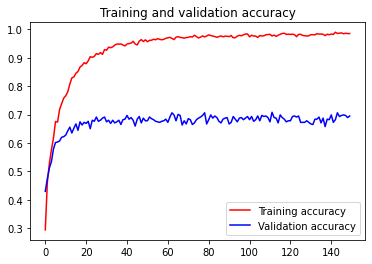

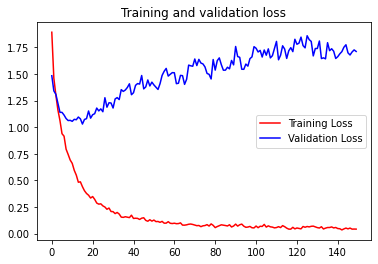

In [56]:
def model_performance(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  pass

model_performance(h_history)

In [57]:
loss, accuracy = h_model.evaluate(x_test, y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

20/20 [==============================] - 0s 3ms/step - loss: 1.7510 - accuracy: 0.6968
Test Loss:  1.7509576082229614
Test Accuracy:  0.696825385093689


Precision:  0.6964727334131119
Recall:     0.6935575746920143
F_score:    0.6939201271613122
[[45  4  3  5  6  2  0  1  1]
 [ 2 41  4  4  5  3  1  2  1]
 [ 4  1 40  4  3  5  2  2  1]
 [ 2  4  3 48  9  2  0  2  4]
 [ 2  3  3  5 56  0  0  1  2]
 [ 0  2  2  4  1 61  1  3  9]
 [ 0  0  0  0  0  1 58  7  5]
 [ 1  3  6  0  0  5  6 53  4]
 [ 0  2  1  1  0  3  6 10 37]]
0.67
0.65
0.65
0.65
0.78
0.73
0.82
0.68
0.62


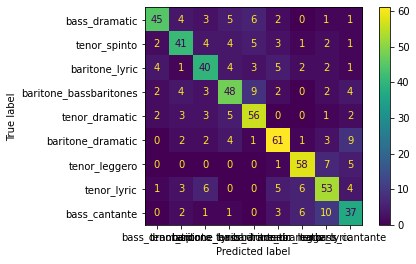

In [58]:
y_pred = h_model.predict(x_test)
y_pred_list = [y_pred[i].argmax() for i in range(len(x_test))]
y_true_list = [y_test[i].argmax() for i in range(len(x_test))]

true_labels = targets_to_labels(y_true_list)
pred_labels = targets_to_labels(y_pred_list)

conf_matrix = metrics.confusion_matrix(true_labels, pred_labels)
cm = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=to_evaluate).plot()
# metrics.confusion_matrix()
precision, recall, f_score, _ = metrics.precision_recall_fscore_support(y_true_list, y_pred_list, average='macro')
con_mat_norm = np.around(conf_matrix.astype('int') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

print('Precision: ', precision)
print('Recall:    ', recall)
print('F_score:   ', f_score)
print(conf_matrix)
for i in range(num_labels):
  print(con_mat_norm[i][i])

#First 2 components

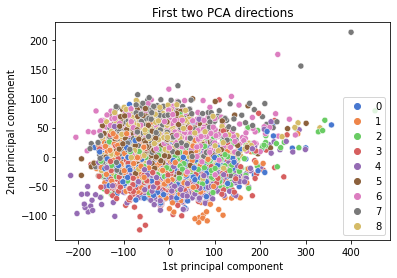

In [19]:

pca_2 = PCA(n_components=2)

# Fit and transform scaled data
pca_2.fit(features)
data_2pc = pca_2.transform(features)
ax = sns.scatterplot(x=data_2pc[:,0], 
                   y=data_2pc[:,1], 
                   hue=targets,
                   palette=sns.color_palette("muted", n_colors=num_labels))

ax.set(xlabel='1st principal component', ylabel='2nd principal component', title='First two PCA directions')
plt.show()

# import matpl

#First 3 components

[ 37.82125813 -41.12132694  -2.41717604]


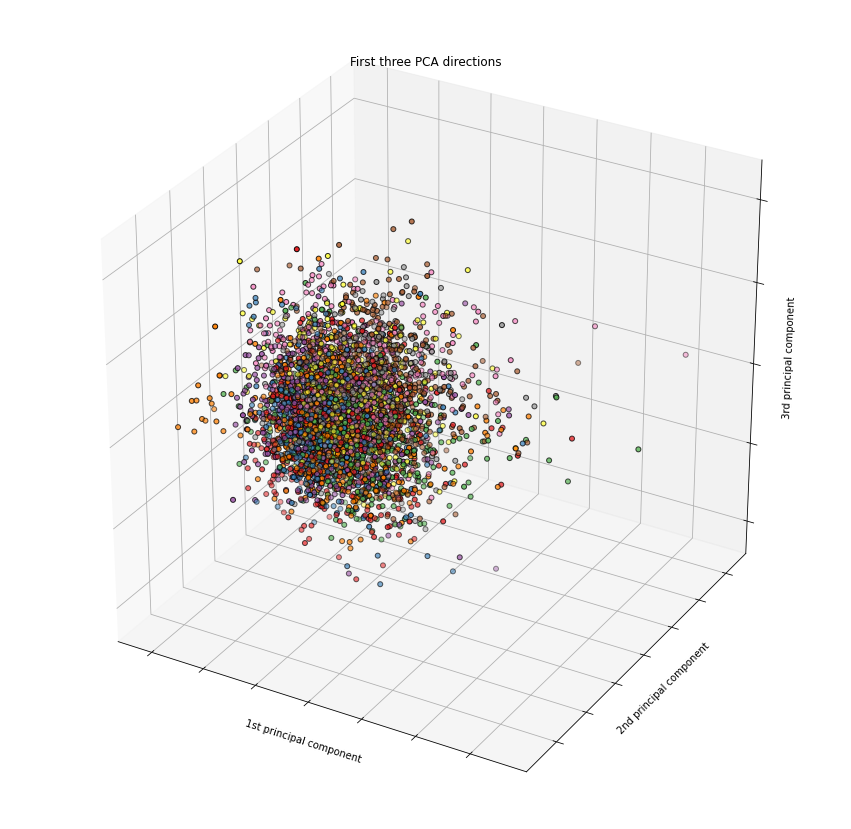

In [20]:
pca_3 = PCA(n_components=3)

# Fit and transform scaled data
pca_3.fit(features)
data_3pc = pca_3.transform(features)

print(data_3pc[0])

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data_3pc[:, 0], data_3pc[:, 1], data_3pc[:, 2], c=targets,
          cmap=plt.cm.Set1, edgecolor='k', s=25, label=targets)

# ax.legend(["non-pulsars"], fontsize="large")

ax.set_title("First three PCA directions")
ax.set_xlabel("1st principal component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd principal component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd principal component")
ax.w_zaxis.set_ticklabels([])

plt.show()

#Trying New log(spectrogram)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#creating data directories.
#if already present, ignore

base_dir = main_dir + 'Main_Notebooks/New_Features/Log_spectrogram/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

paths = [base_dir, train_dir, validation_dir, test_dir]

for path in paths:
  if os.path.exists(path)==False:
    print('Creating this directory: ', path)
    !mkdir "{path}"



#!mkdir '{base_dir}' "{train_dir}" '{validation_dir}' '{test_dir}'

In [ ]:
#split the data into train, test and validation
def data_splits(data, test_split, val_split):
  '''creating the train, validation and test sets'''
  assert test_split < 0.4
  assert val_split < 0.4


  
  len_data = len(data)
  test_inv  = int(round(1/test_split))
  val_inv = int(round(1/val_split))
  
  x_data = data[len_data//test_inv:]
  test_data = data[0:len_data//test_inv]
  val_data = x_data[0:len(x_data)//val_inv]
  train_data = x_data[len(x_data)//val_inv:]

  print('Total data samples: ', len_data)
  print('Train samples: ', len(train_data))
  print('Validation samples: ', len(val_data))
  print('Test samples: ', len(test_data))

  return [train_data, test_data, val_data]

In [ ]:
data_paths = data['path']
print(data_paths[0])
dataset = data_splits(data, 0.1, 0.1)

/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Huw_Montague_Rendall__Oh_what_a_beautiful_morning___and__Ombra_mai_fu_-8TkLB2WTroM_3.wav
Total data samples:  1878
Train samples:  1522
Validation samples:  169
Test samples:  187


In [ ]:
def spectrograms_to_dir(dataset, base_dir):
  train, test, validation = dataset
  dataset = [train, test, validation]
  dataset_names = ['train', 'test', 'validation']

  for subregister in train['subregister'].unique():
    for sub_directory in os.listdir(base_dir):
      new_dir = base_dir + '{}/'.format(sub_directory) + '{}'.format(subregister)
      print(os.path.basename(new_dir))
      !mkdir '{new_dir}'
  
  for i in range(len(dataset_names)):
    for file_name in dataset[i]['path']:
      sub_directory = os.path.basename(os.path.dirname(file_name))
      new_dir = base_dir + '{}/'.format(dataset_names[i]) + '{}'.format(sub_directory)
      print(file_name)
      waveform, sample_rate = librosa.load(file_name)
      spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
      # removes the phase (we only care about the magnitude)
      spectrogram = tf.abs(spectrogram)
      try:
        spectrogram = spectrogram.numpy().T.reshape(258,516)
        spectrogram = tf.math.log(spectrogram).numpy()
      except ValueError:
        pass

      filename = os.path.basename(file_name).rsplit(".", maxsplit=1)[0]
      print(filename)



      # im.save(new_dir + '/{}.png'.format(os.path.basename(file_name)))
      plt.imsave(new_dir + '/{}.png'.format(filename), spectrogram, cmap='summer')

  pass



spectrograms_to_dir(dataset, base_dir)

Bass_Dramatic
Bass_Dramatic
Bass_Dramatic
Tenor_Leggero
Tenor_Leggero
Tenor_Leggero
Baritones_Dramatic
Baritones_Dramatic
Baritones_Dramatic
Tenor_Dramatic
Tenor_Dramatic
Tenor_Dramatic
Tenor_Spinto
Tenor_Spinto
Tenor_Spinto
Baritones_BassBaritones
Baritones_BassBaritones
Baritones_BassBaritones
Bass_Cantante
Bass_Cantante
Bass_Cantante
Tenor_Lyric
Tenor_Lyric
Tenor_Lyric
Baritones_Lyric
Baritones_Lyric
Baritones_Lyric
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_44.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_44
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Il_ratto_del_serraglio-YxBOGw6ma7A_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_ratto_del_serraglio-YxBOGw6ma7A_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Joshua_Fought_the_Battle_of_Jericho-laOXHoFzQx0_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joshua_Fought_the_Battle_of_Jericho-laOXHoFzQx0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_29.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_29
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_49.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_49
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_40.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_40
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Canti_e_danze_popolari_-_Ululano_i_venti-fBsPlSnt3e4_18.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Canti_e_danze_popolari_-_Ululano_i_venti-fBsPlSnt3e4_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Die_Krähe-jqTMGHni4Tg_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Krähe-jqTMGHni4Tg_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_30.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_30
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_17.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Canti_e_danze_popolari_-_Ululano_i_venti-fBsPlSnt3e4_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Canti_e_danze_popolari_-_Ululano_i_venti-fBsPlSnt3e4_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_20.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Le_nozze_di_Figaro____Se_vuol_ballare,_signor_Contino_-Z7NxN85AvHQ_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Le_nozze_di_Figaro____Se_vuol_ballare,_signor_Contino_-Z7NxN85AvHQ_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Bajo_profundo_Kurt_Moll_sing__madamina_il_catalogo_è_questo_-lOv-_2prgSk_29.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Bajo_profundo_Kurt_Moll_sing__madamina_il_catalogo_è_questo_-lOv-_2prgSk_29
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_1.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mario_Zanasi_-_Ah!_per_sempre_io_ti_perdei_-_Puritani_-_1961-jYdnz_nfjvQ_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Zanasi_-_Ah!_per_sempre_io_ti_perdei_-_Puritani_-_1961-jYdnz_nfjvQ_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/The_Great_Richard_Tucker_Sings__And_This_Is_My_Beloved,__From_Kismet-6Tf6Z7UJ_7c_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Great_Richard_Tucker_Sings__And_This_Is_My_Beloved,__From_Kismet-6Tf6Z7UJ_7c_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tchaikovsky_-_I_Bless_you_forests_-_Mark_Reizen-PiMK7TCxNlM_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tchaikovsky_-_I_Bless_you_forests_-_Mark_Reizen-PiMK7TCxNlM_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Die_Krähe-jqTMGHni4Tg_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Krähe-jqTMGHni4Tg_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll-MJoCDo15d7Q_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll-MJoCDo15d7Q_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_17.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/George_London_-_Le_Veau_d_Or-CB0mEN7VEYA_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


George_London_-_Le_Veau_d_Or-CB0mEN7VEYA_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_16.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Joshua_Fought_the_Battle_of_Jericho-laOXHoFzQx0_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joshua_Fought_the_Battle_of_Jericho-laOXHoFzQx0_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tchaikovsky_-_I_Bless_you_forests_-_Mark_Reizen-PiMK7TCxNlM_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tchaikovsky_-_I_Bless_you_forests_-_Mark_Reizen-PiMK7TCxNlM_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_41.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_41
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_21.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Me_so___mbraciato__e_sole-SVd6cIP-dAs_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Me_so___mbraciato__e_sole-SVd6cIP-dAs_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_34.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_34
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_37.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_37
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_32.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_32
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Huw_Montague_Rendall__Oh_what_a_beautiful_morning___and__Ombra_mai_fu_-8TkLB2WTroM_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Huw_Montague_Rendall__Oh_what_a_beautiful_morning___and__Ombra_mai_fu_-8TkLB2WTroM_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Die_Krähe-jqTMGHni4Tg_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Krähe-jqTMGHni4Tg_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_33.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_33
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Ambrogio_Maestri_-_Ambrogio_Maestri_-_Falstaff-hhEeWVMiLdw_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ambrogio_Maestri_-_Ambrogio_Maestri_-_Falstaff-hhEeWVMiLdw_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_39.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_39
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Die_Krähe-jqTMGHni4Tg_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Krähe-jqTMGHni4Tg_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Me_so___mbraciato__e_sole-SVd6cIP-dAs_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Me_so___mbraciato__e_sole-SVd6cIP-dAs_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Canti_e_danze_popolari_-_Ululano_i_venti-fBsPlSnt3e4_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Canti_e_danze_popolari_-_Ululano_i_venti-fBsPlSnt3e4_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll-MJoCDo15d7Q_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll-MJoCDo15d7Q_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_49.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_49
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Joshua_Fought_the_Battle_of_Jericho-laOXHoFzQx0_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joshua_Fought_the_Battle_of_Jericho-laOXHoFzQx0_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Bajo_profundo_Kurt_Moll_sing__madamina_il_catalogo_è_questo_-lOv-_2prgSk_30.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Bajo_profundo_Kurt_Moll_sing__madamina_il_catalogo_è_questo_-lOv-_2prgSk_30
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_35.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_35
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_49.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_49
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_24.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Eugene_Onegin,_Op._24,_TH_5_(Excerpts_Sung_in_German)__-_Sie_schrieben_mir,_wozu_es_leugnen-GkDOEuCnkrM_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Eugene_Onegin,_Op._24,_TH_5_(Excerpts_Sung_in_German)__-_Sie_schrieben_mir,_wozu_es_leugnen-GkDOEuCnkrM_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_28.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_28
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_50.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_50
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_28.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_28
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Die_Krähe-jqTMGHni4Tg_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Krähe-jqTMGHni4Tg_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/The_Great_Richard_Tucker_Sings__And_This_Is_My_Beloved,__From_Kismet-6Tf6Z7UJ_7c_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Great_Richard_Tucker_Sings__And_This_Is_My_Beloved,__From_Kismet-6Tf6Z7UJ_7c_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Aida_-_Celeste_Aida-JOBXW4CFIKM_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_-_Celeste_Aida-JOBXW4CFIKM_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_37.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_37
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_28.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_28
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_-_Ave_Maria_1967_(rare_version)-qURqUGqlbsM_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_-_Ave_Maria_1967_(rare_version)-qURqUGqlbsM_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Quando_di_sangue_tinto__(Belisario,_Alamiro)-fnhwXPAB34c_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Quando_di_sangue_tinto__(Belisario,_Alamiro)-fnhwXPAB34c_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Don_Giovanni_-__A_cenar_teco__-_Glyndebourne-YifEnNzKDpU_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Giovanni_-__A_cenar_teco__-_Glyndebourne-YifEnNzKDpU_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_53.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_53
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_50.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_50
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Me_so___mbraciato__e_sole-SVd6cIP-dAs_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Me_so___mbraciato__e_sole-SVd6cIP-dAs_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_16.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Il_ratto_del_serraglio-YxBOGw6ma7A_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_ratto_del_serraglio-YxBOGw6ma7A_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll-MJoCDo15d7Q_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll-MJoCDo15d7Q_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/CESARE_SIEPI_sings__O_Isis_and_Osiris_-X0v-haqRQ9Y_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CESARE_SIEPI_sings__O_Isis_and_Osiris_-X0v-haqRQ9Y_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Il_ratto_del_serraglio-YxBOGw6ma7A_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_ratto_del_serraglio-YxBOGw6ma7A_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Eugene_Onegin,_Op._24,_TH_5_(Excerpts_Sung_in_German)__-_Sie_schrieben_mir,_wozu_es_leugnen-GkDOEuCnkrM_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Eugene_Onegin,_Op._24,_TH_5_(Excerpts_Sung_in_German)__-_Sie_schrieben_mir,_wozu_es_leugnen-GkDOEuCnkrM_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_48.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_48
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Como_la_Rosa_en_la_Guerta-zvts5CCorec_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Como_la_Rosa_en_la_Guerta-zvts5CCorec_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_32.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_32
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_38.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_38
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_35.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_35
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Die_Krähe-jqTMGHni4Tg_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Krähe-jqTMGHni4Tg_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Quando_di_sangue_tinto__(Belisario,_Alamiro)-fnhwXPAB34c_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Quando_di_sangue_tinto__(Belisario,_Alamiro)-fnhwXPAB34c_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Tosca_-_Recondita_armonia-K6P-lgE2w7g_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tosca_-_Recondita_armonia-K6P-lgE2w7g_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_1.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Como_la_Rosa_en_la_Guerta-zvts5CCorec_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Como_la_Rosa_en_la_Guerta-zvts5CCorec_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Sometimes_I_Feel_Like_a_Motherless_Child-8W6BREmVs6g_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sometimes_I_Feel_Like_a_Motherless_Child-8W6BREmVs6g_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_33.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_33
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_51.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_51
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_46.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_46
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_31.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_31
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_17.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_36.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_36
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/CESARE_SIEPI_sings__O_Isis_and_Osiris_-X0v-haqRQ9Y_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CESARE_SIEPI_sings__O_Isis_and_Osiris_-X0v-haqRQ9Y_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_34.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_34
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Tosca_-_Recondita_armonia-K6P-lgE2w7g_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tosca_-_Recondita_armonia-K6P-lgE2w7g_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/luigi_alva_-_granada-PXn-tpRVVRI_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


luigi_alva_-_granada-PXn-tpRVVRI_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Me_so___mbraciato__e_sole-SVd6cIP-dAs_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Me_so___mbraciato__e_sole-SVd6cIP-dAs_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_34.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_34
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Le_nozze_di_Figaro____Se_vuol_ballare,_signor_Contino_-Z7NxN85AvHQ_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Le_nozze_di_Figaro____Se_vuol_ballare,_signor_Contino_-Z7NxN85AvHQ_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Maria_-_West_Side_Story-X_AArumG76U_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Maria_-_West_Side_Story-X_AArumG76U_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_32.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_32
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_34.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_34
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_18.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_34.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_34
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_30.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_30
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_37.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_37
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Don_Giovanni_-__A_cenar_teco__-_Glyndebourne-YifEnNzKDpU_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Giovanni_-__A_cenar_teco__-_Glyndebourne-YifEnNzKDpU_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_28.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_28
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Die_Krähe-jqTMGHni4Tg_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Krähe-jqTMGHni4Tg_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Aida_-_Celeste_Aida-JOBXW4CFIKM_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_-_Celeste_Aida-JOBXW4CFIKM_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_20.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Canti_e_danze_popolari_-_Ululano_i_venti-fBsPlSnt3e4_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Canti_e_danze_popolari_-_Ululano_i_venti-fBsPlSnt3e4_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_25.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Tosca_-_Recondita_armonia-K6P-lgE2w7g_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tosca_-_Recondita_armonia-K6P-lgE2w7g_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_19.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_17.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Maria_-_West_Side_Story-X_AArumG76U_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Maria_-_West_Side_Story-X_AArumG76U_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_40.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_40
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tchaikovsky_-_I_Bless_you_forests_-_Mark_Reizen-PiMK7TCxNlM_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tchaikovsky_-_I_Bless_you_forests_-_Mark_Reizen-PiMK7TCxNlM_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli-O_sole_mio-4QG0HK1CTMQ_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli-O_sole_mio-4QG0HK1CTMQ_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_-_Ave_Maria_1967_(rare_version)-qURqUGqlbsM_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_-_Ave_Maria_1967_(rare_version)-qURqUGqlbsM_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Me_so___mbraciato__e_sole-SVd6cIP-dAs_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Me_so___mbraciato__e_sole-SVd6cIP-dAs_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Ambrogio_Maestri_-_Ambrogio_Maestri_-_Falstaff-hhEeWVMiLdw_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ambrogio_Maestri_-_Ambrogio_Maestri_-_Falstaff-hhEeWVMiLdw_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_44.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_44
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tchaikovsky_-_I_Bless_you_forests_-_Mark_Reizen-PiMK7TCxNlM_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tchaikovsky_-_I_Bless_you_forests_-_Mark_Reizen-PiMK7TCxNlM_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_43.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_43
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Quando_di_sangue_tinto__(Belisario,_Alamiro)-fnhwXPAB34c_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Quando_di_sangue_tinto__(Belisario,_Alamiro)-fnhwXPAB34c_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Maria_-_West_Side_Story-X_AArumG76U_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Maria_-_West_Side_Story-X_AArumG76U_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_23.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_30.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_30
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Tosca_-_Recondita_armonia-K6P-lgE2w7g_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tosca_-_Recondita_armonia-K6P-lgE2w7g_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Tosca_-_Recondita_armonia-K6P-lgE2w7g_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tosca_-_Recondita_armonia-K6P-lgE2w7g_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/luigi_alva_-_granada-PXn-tpRVVRI_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


luigi_alva_-_granada-PXn-tpRVVRI_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_30.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_30
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_28.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_28
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/luigi_alva_-_granada-PXn-tpRVVRI_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


luigi_alva_-_granada-PXn-tpRVVRI_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_35.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_35
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Huw_Montague_Rendall__Oh_what_a_beautiful_morning___and__Ombra_mai_fu_-8TkLB2WTroM_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Huw_Montague_Rendall__Oh_what_a_beautiful_morning___and__Ombra_mai_fu_-8TkLB2WTroM_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerome_Hines-O_Lord_Most_Holy-F54HBhgkOaI_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_25.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Eugene_Onegin,_Op._24,_TH_5_(Excerpts_Sung_in_German)__-_Sie_schrieben_mir,_wozu_es_leugnen-GkDOEuCnkrM_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Eugene_Onegin,_Op._24,_TH_5_(Excerpts_Sung_in_German)__-_Sie_schrieben_mir,_wozu_es_leugnen-GkDOEuCnkrM_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_24.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_1.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_52.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_52
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_21.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_21.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Como_la_Rosa_en_la_Guerta-zvts5CCorec_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Como_la_Rosa_en_la_Guerta-zvts5CCorec_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_39.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_39
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_43.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_43
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Peter_Schreier__Allerseelen__R.Strauss-sU5sF1h2NE0_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_30.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_30
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_29.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_29
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_28.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_28
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Tosca_-_Recondita_armonia-K6P-lgE2w7g_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tosca_-_Recondita_armonia-K6P-lgE2w7g_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_38.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_38
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Maria_-_West_Side_Story-X_AArumG76U_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Maria_-_West_Side_Story-X_AArumG76U_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_23.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/The_Great_Richard_Tucker_Sings__And_This_Is_My_Beloved,__From_Kismet-6Tf6Z7UJ_7c_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Great_Richard_Tucker_Sings__And_This_Is_My_Beloved,__From_Kismet-6Tf6Z7UJ_7c_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_28.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_28
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_32.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_32
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Sometimes_I_Feel_Like_a_Motherless_Child-8W6BREmVs6g_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sometimes_I_Feel_Like_a_Motherless_Child-8W6BREmVs6g_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Il_ratto_del_serraglio-YxBOGw6ma7A_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_ratto_del_serraglio-YxBOGw6ma7A_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_45.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_45
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mario_Zanasi_-_Ah!_per_sempre_io_ti_perdei_-_Puritani_-_1961-jYdnz_nfjvQ_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Zanasi_-_Ah!_per_sempre_io_ti_perdei_-_Puritani_-_1961-jYdnz_nfjvQ_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_16.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_20.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_44.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_44
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_42.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_42
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mario_Zanasi_-_Ah!_per_sempre_io_ti_perdei_-_Puritani_-_1961-jYdnz_nfjvQ_1.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Zanasi_-_Ah!_per_sempre_io_ti_perdei_-_Puritani_-_1961-jYdnz_nfjvQ_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Don_Giovanni_-__A_cenar_teco__-_Glyndebourne-YifEnNzKDpU_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Giovanni_-__A_cenar_teco__-_Glyndebourne-YifEnNzKDpU_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_III_-__Son_io,_mio_Carlo__(Rodrigo,_Don_Carlo)-Yv6W3VNvnqw_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_48.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_48
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll-MJoCDo15d7Q_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll-MJoCDo15d7Q_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff_-_Aria_of_Attila-7Ht3eDUcn0s_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_33.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_33
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_43.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_43
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kosma_-_Sans_Coup_Férir_-_7._Coucher_de_soleil-A8fUKN_spyk_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_36.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_36
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gioachino_Rossini_-_Stabat_Mater_-_Pro_peccatis_suae_gentis_(Ildebrando_D_Arcangelo)-UX9ng7z7RL0_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_40.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_40
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_22.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Joshua_Fought_the_Battle_of_Jericho-laOXHoFzQx0_0.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joshua_Fought_the_Battle_of_Jericho-laOXHoFzQx0_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_29.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_29
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Como_la_Rosa_en_la_Guerta-zvts5CCorec_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Como_la_Rosa_en_la_Guerta-zvts5CCorec_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_38.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_38
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Lawrence_Winters__-_I_Got_Plenty_O__Nuttin__(_1951_)-k_GSYVhGGKE_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lawrence_Winters__-_I_Got_Plenty_O__Nuttin__(_1951_)-k_GSYVhGGKE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh_Promise_Me_(arr._G._Stoll_for_voice_and_orchestra)-jg72fO7YawE_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero_Semiramide_-_Deh!_Ti_Ferma-EjnbRIahF1Q_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_33.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_33
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_29.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_29
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_22.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lauritz_Melchior_-_No,_Pagliaccio_non_son!-HkcO-Pg1CvM_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Aida_-_Celeste_Aida-JOBXW4CFIKM_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_-_Celeste_Aida-JOBXW4CFIKM_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_1.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_31.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_31
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_31.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_31
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_21.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Aida_-_Celeste_Aida-JOBXW4CFIKM_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_-_Celeste_Aida-JOBXW4CFIKM_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


EXTRACT___IL_TROVATORE__Il_balen_del_suo_sorriso__Verdi_-_Teatro_Real-jPdar1mqgxc_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_35.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_35
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Las_gaviotas_-_Alonso_de_Silva-rR3ygt_jHTI_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-GREAT_IS_THY_FAITHULNESS.wmv-vR5iJJP2cwY_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_16.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Maurizio_Muraro___Maestro_di_Cappella_-__2_3-6qQEQI6fCtQ_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_20.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Greatest_Singers_-_FERRUCCIO_TAGLIAVINI-4cDySCPSDsM_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Norman_Reinhardt_-_Live_La_Straniera-VjPOY7VSUDM_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/luigi_alva_-_granada-PXn-tpRVVRI_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


luigi_alva_-_granada-PXn-tpRVVRI_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_48.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_48
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Magic_Flute_-_2_Basso_Arias-BGSlaQ736gk_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_-_Ave_Maria_1967_(rare_version)-qURqUGqlbsM_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_-_Ave_Maria_1967_(rare_version)-qURqUGqlbsM_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Gioconda_-_Cielo_e_mar-OlBC0eKPD6U_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II,_Scene_2_-_Tutto_è_deserto-M3S3ZOxjBu0_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Il_ratto_del_serraglio-YxBOGw6ma7A_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_ratto_del_serraglio-YxBOGw6ma7A_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_31.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey___The_Impossible_Dream-KfKIVOf4IzE_31
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_46.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_46
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/luigi_alva_-_granada-PXn-tpRVVRI_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


luigi_alva_-_granada-PXn-tpRVVRI_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_28.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_28
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Solenne_in_quest_ora_-_Giuseppe_Giacomini_(tenor)-S4MLxyhnxO8_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_47.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_47
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Bjorling_-_Nessun_Dorma_(1944)-wPEG914GATk_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Me_so___mbraciato__e_sole-SVd6cIP-dAs_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Me_so___mbraciato__e_sole-SVd6cIP-dAs_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_34.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_34
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_45.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_45
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Betlehems_stjärna_(Gläns_över_sjö_och_strand)-isUF6rf9XME_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Aida_-_Celeste_Aida-JOBXW4CFIKM_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_-_Celeste_Aida-JOBXW4CFIKM_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-_N._10._Aria_-_“Non_più_andrai,_farfallone_amoroso”-UlVd7mMfjP4_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_16.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_14.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_39.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_39
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_36.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_36
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_21.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Bajo_profundo_Kurt_Moll_sing__madamina_il_catalogo_è_questo_-lOv-_2prgSk_31.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Bajo_profundo_Kurt_Moll_sing__madamina_il_catalogo_è_questo_-lOv-_2prgSk_31
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giorgio_Zancanaro_-_Tardo_per_gli_anni-hHTwolA8BOc_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_sings___Non_ti_scordar_di_me__-aiLcI5_w7Qo_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli-O_sole_mio-4QG0HK1CTMQ_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli-O_sole_mio-4QG0HK1CTMQ_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/The_Great_Richard_Tucker_Sings__And_This_Is_My_Beloved,__From_Kismet-6Tf6Z7UJ_7c_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Great_Richard_Tucker_Sings__And_This_Is_My_Beloved,__From_Kismet-6Tf6Z7UJ_7c_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Charles_Castronovo_-_Franz_Lehár_-_Das_Land_des_Lächelns___Berlin_Opera_Night_(2003)-Pbpvq_XuWwk_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aleko_-_Aleko_s_Cavatina-Kj65pTSUJAQ_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Ecco_ridente_in_cielo_-_Il_barbiere_di_Siviglia_-_Rossini_(1_2)-4xqRx5ggOqs_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi-_E_lucevan_le_stelle_(live_1959)-9bKH6E38DjQ_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_Tosca___Act_3_-__E_lucevan_le_stelle_-3VOD_oE52QY_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_To_bilo_ranneyu_vesnoy_von_P.Tschaikowsky-Ug_nVTT75jU_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_18.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Ah_sì,_ben_mio..._l_onda_de_suoni_mistici..._Di_quella_Pira_-0uO8RuWbhUM_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Set_Svanholm_Sings_Walter_s_Prize_Song_from_Die_Meistersinger.__1947-4ymF7_urKf8_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Veder_parmi,_or_che_nel_fondo_(Vivaldi)_Ildebrando_D_Arcangelo-0900_MJDK9M_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sergei_Lemeshev_L_amour!.._Ah!_lève-toi,_soleil!.._Romeo_et_Juliette-pWOzdrm6hd8_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_27.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


COME_DAL_CIEL_PRECIPITA_-_P._PLISHKA-xLj7hmGj_XU_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_31.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_31
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ildebrando_D_Arcangelo_-_Deh,_vieni_alla_finestra_-_Salzburg_2014--PVQASX3tKo_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_Love_You_Truly_(arr._G._Stoll_for_voice_and_orchestra)-mkWk2cQ7TsY_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Tosca_-_Recondita_armonia-K6P-lgE2w7g_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tosca_-_Recondita_armonia-K6P-lgE2w7g_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Ambrogio_Maestri_-_Ambrogio_Maestri_-_Falstaff-hhEeWVMiLdw_0.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ambrogio_Maestri_-_Ambrogio_Maestri_-_Falstaff-hhEeWVMiLdw_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_29.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_29
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nobody_Knows_the_Trouble_I’ve_Seen-6b2hXVHvIt4_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_C_est_en_croyant_revoir..._Ô_vin,_dissipe_la_tristesse_!__from_Hamlet,_Act_2_(Voice)-VqSCR7Y2J0M_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_Franz_Schubert__Standchen__Milan_1938-R7sWW9GK_78_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Como_la_Rosa_en_la_Guerta-zvts5CCorec_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Como_la_Rosa_en_la_Guerta-zvts5CCorec_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_1.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Nessun_dorma__(¡¡Bis!!)_Turandot,_G._Puccini_-_Giuseppe_Giacomini-88LTLkV83_Q_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CORRECT_PITCH_-_Vi_ravviso_-_Nicolai_Ghiaurov_(1963)-sbq9fYvX0w8_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Quei_Numi_furenti_-_Ildebrando_D_Arcangelo-zRIcuBxGrH8_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Wagner_-_Tannhäuser,_WWV_70___Act_3_-__Hör__an,_Wolfram!..._Inbrunst_im_Herzen_-zgg4pr7A_oY_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_Meistersinger_von_Nürnberg_-__Wahn__(_Madness_)_–_Glyndebourne-EdUR5Q2cCaQ_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_23.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_23
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Plaisir_d_amour_Nicola_Rossi_Lemeni-Z_zJx54ILkQ_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_Donna_non_vidi_mai._Digitally_remastered.-VHb8m0e-k1Q_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_35.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_35
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__O_Tu,_Palermo_-wt9D4u2W90o_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_47.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_47
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Le_nozze_di_Figaro____Se_vuol_ballare,_signor_Contino_-Z7NxN85AvHQ_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Le_nozze_di_Figaro____Se_vuol_ballare,_signor_Contino_-Z7NxN85AvHQ_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Mouvements_du_cœur_-__gqDOGoPnE_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_26.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Boris_Christoff,_bass_-_Mussorgsky_-_Boris_Godunov_-__Death_Scene__(video_-1956)-oZrNvc225_0_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Mozart_-_Don_Giovanni,__Il_mio_tesoro_-sS1RY6WY4Pg_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carmen_-_La_fleur_que_tu_m´avais_jetée-mTl6btZBXcg_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_25.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_forza_del_destino,_Act_III,_Scene_2_-_Morir!_Tremenda_cosa-IgJThs3qHEQ_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_46.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_46
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_29.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_29
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Le_nozze_di_Figaro____Se_vuol_ballare,_signor_Contino_-Z7NxN85AvHQ_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Le_nozze_di_Figaro____Se_vuol_ballare,_signor_Contino_-Z7NxN85AvHQ_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Juive_-_Rachel,_quand_du_Seigneur-bzdj1Z-4iE4_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jan_Peerce_Sings__When_You_and_I_Were_Young,_Maggie_-3aDAkihiGGU_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gde_ti,_zvezdochka_(Where_art_thou,_little_star)-FvQ3vZIeWo0_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_9.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leon_Kosavic_sings_-_Or_dove_fuggo_io_mai_Ah!_Per_sempre_io_ti_perdei_(V.Bellini__I_Puritani_)-HwpyeSJUrfo_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L_anima_ho_stanca_(Adriana_Lecouvreur)_-_Giuseppe_Giacomini-bQuqg7znLkk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KURT_BAUM_-_SCRIABIN___BORODIN_songs.wmv-lm49JJRhxHk_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jussi_Björling_-_Vesti_La_Giubba-xFuy1MTrlcc_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_-_Be_My_Love-EQz1McBv0fw_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_16.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ombra_Mai_Fu_-_Franco_Corelli_(Amazing!)-Fqtq5BmgTHc_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Di_Provenza_-_Giorgio_Zancanaro-4uCMthTErbw_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_damnation_de_Faust,_Op._24,_Part_II_-_Voici_des_roses_(Sung_in)-buBtRwYoxwQ_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_6.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_33.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_33
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_25.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_25
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ferruccio_Tagliavini_-_Una_furtiva_lagrima_(Live,_1980)-HBkzv95MuRQ_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/luigi_alva_-_granada-PXn-tpRVVRI_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


luigi_alva_-_granada-PXn-tpRVVRI_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Don_Giovanni_-__A_cenar_teco__-_Glyndebourne-YifEnNzKDpU_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Giovanni_-__A_cenar_teco__-_Glyndebourne-YifEnNzKDpU_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_La_partida_-_Alvarez___Blasco-5gUT7hXkySI_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rolando_Villazón___Xavier_de_Maistre_–_Guastavino_-_Violetas-RWiQnw045a0_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_E_lucevan_le_stelle_1904._Digitally_remastered.-3TjEoAXzJ9E_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_27.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_27
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Lohengrin_-_Act_III_-_Hochstes_Vertrau_n_hast_du_mir_schon_zu_danken-isfnBJ7PGl0_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Schubert_-_An_die_Musik___Finley_·_Harding_·_Berliner_Philharmoniker-0wn5xM4II7M_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jon_Vickers_-_Flotow_-_Martha,__M_appari_Tutt_amor_-aLGBo1KLR-k_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll-MJoCDo15d7Q_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll-MJoCDo15d7Q_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


She_is_as_lovely_as_the_moon_(sung_in_russian)-N9z6ky4f0Yk_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Michael_Spyres._Cilèa._L_Arlesiana._E_la_solita_storia-T8IVTB2BvGk_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_20.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Björling_-__Je_crois_entendre_encore__-_Pêcheurs_de_perles.-_QFgPtmM7Ps_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Luigi_Alva]_Ecco,_ridente_in_cielo-XHpVZhZEMDU_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_4.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicola_Zaccaria_-_A_te_l´estremo_addio_..._Il_lacerato_spirito_(_Simon_Boccanegra_-_Giuseppe_Verdi_)-ymD0cNL1oLM_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_15.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_24.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_24
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Aida_1962_-_#1_Act_I_Celeste_Aida_-_Jon_Vickers,_tenor-5Nsi3kGjxnE_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mario_Lanza_The_Lord_s_Prayer-4a3ZzPDvWDE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Quando_di_sangue_tinto__(Belisario,_Alamiro)-fnhwXPAB34c_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Quando_di_sangue_tinto__(Belisario,_Alamiro)-fnhwXPAB34c_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Marko_Mimica_-_BBC_Cardiff_Singer_of_the_World_2013_Final_(Part_Two)-GY74YpyPt-s_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_26.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Gedda_-_Domine_Deus_(_Petite_Messe_solennelle_-_Gioachino_Rossini_)-nbXQfddRWSU_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_20.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_Song_of_the_Volga_Boatmen__or__Эй,_ухнем__-_Boris_Christoff_(Score_and_video)_HQ_1080p-d2K2Vqywsrk_20
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_30.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_30
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_45.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_45
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll-MJoCDo15d7Q_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll-MJoCDo15d7Q_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti._L_elisir_d__amore___Turandot._London_1982.-T6RvQBwBxH8_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli_sings_Flotow_-_M_apparì_tutt_amor,_from_Martha-WUEXBcuOAUk_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_11.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Die_drei_Zigeuner,_S._320-eF-NghjfJzs_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Die_drei_Zigeuner,_S._320-eF-NghjfJzs_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Basso_CESARE_SIEPI_-_Ernani__Infelice!..._e_tuo_credevi___(1948)-5vmbm6GZd4g_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_31.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_31
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-HOME_ON_THE_RANGE.wmv-RvNpS1mYTf8_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_in_a_concert_aria_-_Mozart__Cosi_dunque_tradisci_,_Salzburg_95-nIIAEYfS81s_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_12.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luciano_Pavarotti_-_Ave_Maria_(Schubert)-XpYGgtrMTYs_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


G.Verdi._Masked_Ball._Renato_s_ariozo-ocPSUG8mW-g_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_21.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_McFerrin_Sr._sings_spirituals_(4)-GOwp98jQGH8_21
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


_O_du_mein_holder_Abendstern___George_London-x9asSjWyZ1I_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franco_Corelli_sings_Nessun_Dorma-8bvj6ML1xvM_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_2.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_Giacomini._O_sole_mio_-uTse_XJX32g_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Como_la_Rosa_en_la_Guerta-zvts5CCorec_3.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Como_la_Rosa_en_la_Guerta-zvts5CCorec_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_17.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi,_L_Alba_Separa_Dalla_Luce_L_Ombra-YhYAeqSM-DU_17
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Joseph_Rouleau_sings__Visions_infernales__(1971)-L1FRtkQzOnE_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Una_Furtiva_Lacrima-4ymPaEDDP9I_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_7.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Winterreise,_Op._89,_D._911_-_No._7._Auf_dem_Flusse-Ke82-bmjaWo_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_38.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_38
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Beniamino_Gigli-O_sole_mio-4QG0HK1CTMQ_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Beniamino_Gigli-O_sole_mio-4QG0HK1CTMQ_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Verdi_-_Il_Trovatore___Act_3_-__Di_quella_pira_-KxyNrd2kttM_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Un_dì_all_azzurro_spazio,__Andrea_Chenier_-pBOO-G1vDZE_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


L´Arlesiana_-_È_la_solita_storia-gux-YGtcYgs_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Chanson_triste_(version_for_voice_and_piano)-_cG9fJE8Op4_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_10.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_8.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Giuseppe_di_Stefano_-_Che_gelida_manina_(Studio_recording)-BcYEdFG9zJ4_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ave_Signor_(from_Mefistofele)-vHYnnteWcgs_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Yo_M_enamori_D_un_Aire-pWECGtst0kg_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Yo_M_enamori_D_un_Aire-pWECGtst0kg_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_42.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Kurt_Moll_-_Der_Rosenkavalier_-_Baron_Ochs_-_Da_lieg_ich--kW4I0EFYoI_42
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/CESARE_SIEPI_sings__O_Isis_and_Osiris_-X0v-haqRQ9Y_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CESARE_SIEPI_sings__O_Isis_and_Osiris_-X0v-haqRQ9Y_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/CESARE_SIEPI_sings__O_Isis_and_Osiris_-X0v-haqRQ9Y_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CESARE_SIEPI_sings__O_Isis_and_Osiris_-X0v-haqRQ9Y_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Leise_flehen_meine_Lieder_-_Fritz_Wunderlich-uCBCT0mCflw_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Belisario_-_Part_I_-_The_Triumph,__Cesare,_hai_vinto__(Belisario,_Giustiniano,_Alamiro)-vc7JYwd3jvs_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Sometimes_I_Feel_Like_a_Motherless_Child-8W6BREmVs6g_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sometimes_I_Feel_Like_a_Motherless_Child-8W6BREmVs6g_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_18.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Huiracocha_-_Clotilde_Arias-DbfVLFvqUVE_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_0.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_due_Foscari,_Act_I_-_Eccomi_solo_alfine_-_O_vecchio_cor,_che_batti_(Live)-tOSLzofujRw_0
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Valencia_-_Maria_Teresa_Lara-g29DfkSBWZs_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luigi_Alva_-_Te_quiero,_dijiste_-_Maria_Grever-X-NMyYxj7ZY_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Ride_on_King_Jesus-CdUXbASCf0E_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ride_on_King_Jesus-CdUXbASCf0E_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Il_ratto_del_serraglio-YxBOGw6ma7A_26.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_ratto_del_serraglio-YxBOGw6ma7A_26
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_1.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_1
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


I_puritani,_Act_I_-_A_te,_o_cara-fRnm_M-zwpc_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Huw_Montague_Rendall__Oh_what_a_beautiful_morning___and__Ombra_mai_fu_-8TkLB2WTroM_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Huw_Montague_Rendall__Oh_what_a_beautiful_morning___and__Ombra_mai_fu_-8TkLB2WTroM_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Luisa_Miller_-_“Quando_le_sere_al_placido”-LE9n706tugU_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Franz_Schubert—Winterreise—Gerald_Finley_(baritone),_Julius_Drake_(piano)-Jbi2BSGu0jw_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


ROLANDO_VILLAZON_-_DESPEDIDA.wmv-tHW1_2D5m34_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Il_trovatore,_Act_II_-_Il_balen_del_suo_sorriso_(arr._P._Marcarini)-RPx29gq2CDs_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Puccini_-_La_Fanciulla_del_West___Act_3_-__Ch_ella_mi_creda_libero_e_lontano_-Dk0-qm1gNM0_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Rigoletto,_Act_III_-_Finale_of_the_Opera__Quilico,_Munro__Opera_Hamilton_1983_telecast-p497qs2pHn0_3
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tancredi_Pasero,__Confutatis_Maledictis_-CjMBTPxF0T4_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Javier_Camarena_-_BIZET,_Je_crois_entendre_encore_(Les_pêcheurs_de_perles)-lii_e_VSing_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_14.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Don_Carlo,_IGV_7,_Act_I_-__Restate!..._O_signor_di_Fiandra_arrivo__(Rodrigo,_Filippo)-NcgLmXJTxB8_14
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_31.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gösta_Winbergh_-__Konstanze!_Konstanze!_Dich_wiederzusehen!__(W.A._Mozart)-QW_0OvDkz9c_31
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gerald_Finley___Julius_Drake_-_Only_one_who_knows_longing_-_Tschaikovsky-CoYFKpUppSU_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_35.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_35
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_44.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_-_Ella_giammai_m_amò-HA3Dpl35EiI_44
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Deep_River_(arr._D._Sneed)-g9AJMno6F9A_2.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Deep_River_(arr._D._Sneed)-g9AJMno6F9A_2
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_15.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Robert_Weede_–_Ol__Man_River,_1941-qCUQfxsqjmA_15
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Hans_Hotter_sings_An_die_Musik-lcr1LUAYXYY_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Ponchielli_-_La_Gioconda___Act_2_-_Cielo_e_mar!-zkVfdstt1EA_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


JEROME_HINES-BASS-AN_EVENING_PRAYER.wmv-zNje7W-56-s_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Förunderligt_och_märkligt-J4nKlRT6JOo_13.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Förunderligt_och_märkligt-J4nKlRT6JOo_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Seid_fruchtbar_alle_-_Kurt_Moll_-_Leonard_Bernstein-8dNUiuX6geQ_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_5.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_10.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Juan_Diego_Flórez_-_Amor_Marinaro_(Me_voglio_fa’_‘na_casa)-U0WAiGsNZgc_10
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Mariusz_Kwiecień-10V0f51hUR0_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mariusz_Kwiecień-10V0f51hUR0_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Nicolai_Ghiaurov_singt_Lieder_von_Peter_I._Tschaikowsky-dmNpuq5PWTw_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/Sanchez_-_Princesita--vuOGSF0N8k_13.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sanchez_-_Princesita--vuOGSF0N8k_13
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_18.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_BassBaritones/Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Mozart_-_Le_nozze_di_Figaro,_K.492___Act_1_-__Se_vuol_ballare,_signor_Contino_-bZiCDBqaQ9M_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


100_Singers_-_LUIGI_ALVA-CqFtcIB0t0k_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In_Memoriam_-_Stojan_Stojanov_Gancev__-_Otello_-_Dio_mi_potevi-5_51IrrdqdQ_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_16.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


René_Pape__Ella_giammai_m_amo__Don_Carlo_-_G._Verdi-yY0UTrs5gG0_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Christmas_with_Paul_Plishka_-_God_Rest_Ye_Merry,_Gentlemen-KWeqan8LyUc_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/Fix_Me-KIihGQ1v21g_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fix_Me-KIihGQ1v21g_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_11.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


A_Life_for_the_Tsar,_Act_IV_-_Aria-t7d31rAR-zk_11
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_4.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Jerry_Hadley_-_Una_furtiva_lagrima_-_L_elisir_d_amore-HIQvceRWjxo_4
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Leggero/The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The_Cloak,_the_Boat_and_the_Shoes-8M2V4qT49To_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso__Vesti_la_Giubba__Pagliacci_Leoncavallo-T6eyr9O4xro_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Simon_Boccanegra_-_Prologue_-_Che_dicesti_(Paolo,_Pietro,_Simone)-D_q1Ft6fvZg_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_19.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_19
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_16.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Goran_Juric_-_Tschaikowsky-_kaxmPkfnSA_16
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Traviata_-_Di_Provenza_il_mar-CIUzpwCKAC0_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Dramatic/Gute_Nacht-0EiBfM4orT8_9.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Gute_Nacht-0EiBfM4orT8_9
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_22.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_22
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Lyric/Carusso_(the_most_powerful_)-L7g_8i57gu8_5.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carusso_(the_most_powerful_)-L7g_8i57gu8_5
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Bass/Bass_Cantante/Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Samuel_Ramey_on_Sesame_Street_-__L_Toreador_-85ezTttDh0I_7
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Spinto/Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_18.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Carlo_Bergonzi_-_Verdi_Luisa_Miller_1996_Metropolitan-9NQniGmtiy4_18
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_37.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Fete_galante,_Op._25_-_Act_I_Scene_6_-_Aha,_saerdeles_net,_forsiringer_i_guld_(Scaramouche)-zknjl3TiDyY_37
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Tenor/Tenor_Dramatic/Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_6.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Enrico_Caruso_-_I__m_arricordo__e_Napule_(1920)-TmzYZ3cmRyk_6
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_8.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Tito_Gobbi__Musica_proibita_-uuGIXqUUvTE_8
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_12.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


La_Forza_del_destino_-_Morir!_tremenda_cosa_-_Urna_fatale_de_mio_destino-mbAv_EwhCZE_12
/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Dramatic/LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_7.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


LIVE_-_Cornell_MacNeil_-_Il_balen_del_suo_sorriso_(Il_trovatore)_-_1963-LjocDiR3elQ_7


In [ ]:
x = 'Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_44.wav'

v = x.rsplit(".", maxsplit=1)
print(v)


['Nicola_Zaccaria_-_Aria_di_Filippo_II.-il3qQb5AGho_44', 'wav']


In [ ]:
str.rsplit()

/content/gdrive/My Drive/UpworkNotebooks/Opera Files/New_male_only_200_each/Baritones/Baritones_Lyric/Huw_Montague_Rendall__Oh_what_a_beautiful_morning___and__Ombra_mai_fu_-8TkLB2WTroM_3.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Waveform shape: (132300,)
Spectrogram shape: (1032, 129)
[[ -3.8779857  -3.2839596  -4.3474116 ...  -6.9722857  -5.658431
   -6.2615743]
 [ -7.8096776  -5.419454   -5.1371174 ...  -8.32145    -5.728079
   -3.786029 ]
 [ -2.940391   -1.9106362  -1.8628011 ...  -5.978865   -4.8912573
   -6.136158 ]
 ...
 [ -8.923882   -9.644308  -10.084921  ...  -8.676376   -8.855182
   -8.626623 ]
 [-11.762723   -9.33806    -8.69073   ... -10.50305   -11.285749
   -9.914935 ]
 [-11.000436  -11.296343  -10.067586  ...  -8.586485   -8.687611
   -9.324565 ]]


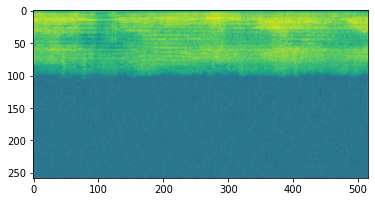

In [ ]:

def get_spectrogram(waveform):

  print(waveform)
  waveform, sample_rate = librosa.load(waveform)

  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)

  # removes the phase (we only care about the magnitude)
  spectrogram = tf.abs(spectrogram)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  spectrogram = spectrogram.numpy().T.reshape(258,516)
  spectrogram = tf.math.log(spectrogram).numpy()
  
  return spectrogram

spectrogram = get_spectrogram(data['path'][0])
print(spectrogram)
plt.figure()
plt.imshow(spectrogram)

im = Image.fromarray(spectrogram)
# plt.savefig()
# im.save(base_dir + 'lol9.png')
plt.imsave(base_dir + 'lol3.png', spectrogram, cmap='summer')


# cm.hsv
# np.uint8()
